<center><h1>Evaluating Autoencoder</h1>
John Ignacio R.M. Jun 2020</center>

In [11]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import read_dataset, split_dataset, AutoencoderModelV1 as A1, plot_confidence_matrix
import pandas as pd

In [2]:
source_path = "../../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

# Tag 2

In [3]:
#read xtohh dataset
df = read_dataset(source_path, signal, bg, "SR", 2)
sets = split_dataset(df, 0.6, 0.2, 0.2, seed)
sets["x"]["train"].head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.130367,0.444366,-0.742402,-1.667881,-0.481700,-0.821738,0.986630,-0.707962,0.286199,-0.060604,-0.308809,1.122165,-0.536045,0.343074
1,-0.154324,-0.757036,-1.493544,-0.589215,0.568245,-0.957618,0.263328,-0.190632,0.639077,-0.390635,-0.565153,-0.441870,-0.438832,-0.838744
2,0.909062,-0.559545,-1.666243,1.438288,0.033011,0.764030,0.097340,-0.283146,0.723747,0.299002,0.002110,0.820174,0.623691,0.595543
3,0.198608,-0.114302,1.325361,0.481073,0.195452,-1.168931,-0.468388,-0.280492,-0.281793,-0.609963,0.190788,1.189810,-0.078685,-0.048231
4,0.395712,-0.212834,-1.236288,-0.036609,-0.663686,0.235153,0.669041,-0.908677,-0.627592,-1.114341,0.051936,1.887263,-1.088247,0.856897


In [5]:
a1_tag2 = A1(sets["x"]["test"].shape[1], 0)
a1_tag2.load("../../saved_models", "tag2_jun_2020")

In [7]:
eval = a1_tag2.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 1.3, save = True, name = "tag2_jun_2020"
)

## Tag 2: Non-weighted evaluation

In [9]:
print("Accuracy:", eval["accuracy"])

Accuracy: 0.8683314415437003


In [10]:
pd.DataFrame(eval["class_report"])

,0,1,macro avg,weighted avg
precision,0.136719,0.992696,0.564707,0.970349
recall,0.760870,0.871212,0.816041,0.868331
f1-score,0.231788,0.927995,0.579892,0.909819
support,46.000000,1716.000000,1762.000000,1762.000000


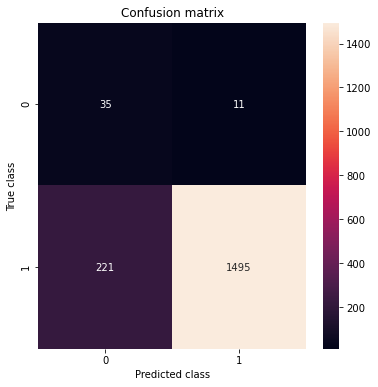

In [12]:
plot_confidence_matrix(eval["cm"], 6, 6, 'd')

## Tag 2: Weighted evaluation

In [13]:
print("Accuracy:", eval["weighted_accuracy"])

Accuracy: 0.861099013204569


In [14]:
pd.DataFrame(eval["weighted_class_report"])

,0,1,macro avg,weighted avg
precision,0.560639,0.957361,0.759000,0.890581
recall,0.808154,0.871815,0.839984,0.861099
f1-score,0.662018,0.912587,0.787303,0.870410
support,0.392325,1.938392,2.330717,2.330717


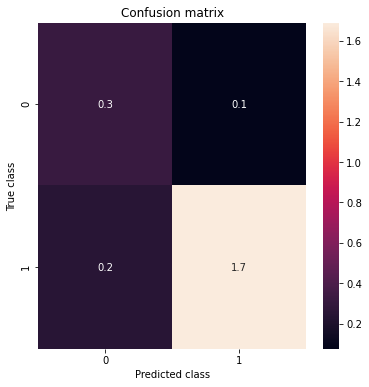

In [15]:
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')